## **04. SVD(Singular Value Decomposition)**

### SVD 개요

SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 일반적으로 SVD는 $m\times n$ 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.
$$A=U\sum V^{T}$$
SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가진다. $\sum$는 대각행렬이며, 0이 아닌 값이 행렬 A의 특이값이다. SVD는 A의 차원이 $m\times n$일 때 차원이 $m\times m$인 U, 차원이 $m\times n$인 $\sum$, 차원이 $n\times n$인 $V^{T}$로 분해된다.

하지만 일반적으로는 다음과 같이 $\sum$의 비대각인 부분과 대각원소 중 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다. 이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 $m\times n$일 때, 차원이 $m\times p$인 U, 차원이 $p\times p$인 $\sum$, 차원이 $p\times n$인 $V^{T}$로 분해한다.
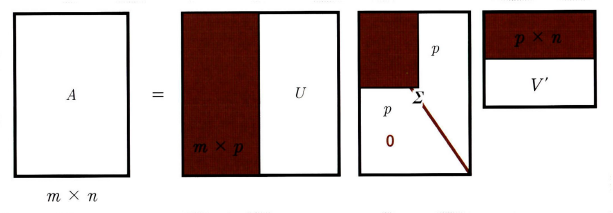

Truncated SVD는 $\sum$의 대각원소 중 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다. 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다. 넘파이의 SVD를 이용해 SVD 연산을 수행하고, 어떤 식으로 SVD로 분해가 되는지 간단한 예제로 살펴보자.

In [1]:
# 넘파이 SVD 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(21)
a=np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.052 -0.111  1.042 -1.257]
 [ 0.745 -1.711 -0.206 -0.235]
 [ 1.128 -0.013 -0.613  1.374]
 [ 1.611 -0.689  0.692 -0.448]]


생성된 a에 SVD를 적용해 U, $\sum$, $V^{T}$을 도출한다. SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, $\sum$ 행렬, $V^{T}$ 행렬을 반환한다. $\sum$ 행렬의 경우 0이 아닌 경우만 1차원 행렬로 표현한다.

In [2]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix :\n', np.round(U, 3))
print('Sigma Value :\n', np.round(Sigma, 3))
print('V transpose matrix :\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix :
 [[ 0.13  -0.666  0.236  0.696]
 [ 0.653  0.011 -0.744  0.142]
 [ 0.236  0.734  0.323  0.549]
 [ 0.708 -0.133  0.535 -0.441]]
Sigma Value :
 [2.531 2.367 1.238 0.076]
V transpose matrix :
 [[ 0.745 -0.641  0.137 -0.122]
 [ 0.278  0.058 -0.523  0.804]
 [ 0.533  0.706  0.462  0.066]
 [-0.289 -0.296  0.703  0.579]]


U 행렬이 $4\times 4$, $V^{T}$ 행렬이 $4\times 4$, $\sum$ 행렬은 1차원 행렬인 (4, )으로 반환되었다.

분해된 행렬들을 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보자. 원본 행렬로의 복원은 이 행렬들을 내적하면 된다. $\sum$의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다.

In [3]:
# Sigma를 다시 0이 포함된 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.052 -0.111  1.042 -1.257]
 [ 0.745 -1.711 -0.206 -0.235]
 [ 1.128 -0.013 -0.613  1.374]
 [ 1.611 -0.689  0.692 -0.448]]


a_는 원본 행렬 a와 동일하게 복원되었다.

데이터 세트가 row 간 의존성이 있을 경우 $\sum$ 값이 어떻게 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자. 의존성을 부여하기 위해 a 행렬의 3번째 row를 'row1 + row2'로 업데이트하고, row4는 row1과 같게 만들겠다.

In [4]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a, 3))

[[-0.052 -0.111  1.042 -1.257]
 [ 0.745 -1.711 -0.206 -0.235]
 [ 0.693 -1.822  0.836 -1.491]
 [-0.052 -0.111  1.042 -1.257]]


위 데이터를 SVD로 분해해 보자.

In [5]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value :\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value :
 [3.395 2.035 0.    0.   ]


이전과 차원은 같지만 $\sum$ 값 중 2개가 0으로 변했다. 즉, 선형독립인 row 벡터의 개수가 2개라는 의미이다. 이렇게 분해된 행렬들을 이용해 다시 원본 행렬로 복원해 보자. 이번에는 전체 데이터를 이용하지 않고, $\sum$의 0에 대응되는 데이터는 제외하고 복원해 보겠다. 즉, $\sum$의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, $V^{T}$의 경우 선행 두 개의 행만 추출해 복원한다.

In [6]:
U_=U[:, :2]
Sigma_=np.diag(Sigma[:2])
Vt_=Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬로 복원
a_=np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.052 -0.111  1.042 -1.257]
 [ 0.745 -1.711 -0.206 -0.235]
 [ 0.693 -1.822  0.836 -1.491]
 [-0.052 -0.111  1.042 -1.257]]


이번에는 Truncated SVD를 이용해 행렬을 분해해 보자. Truncated SVD는 $\sum$ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다. 이렇게 분해하면 인위적으로 더 작은 차원의 행렬로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수는 없다. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다. 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있다.

Truncated SVD를 사이파이 모듈을 이용한다. 임의의 원본 행렬 $6\times 6$을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교해 보겠다.

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6, 6))
print('원본 행렬 :\n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 :', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬 :', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr, Sigma_tr, Vt_tr=svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원 :', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTrncated SVD Sigma 값 행렬 :', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of Trncated SVD
print('\nTrncated SVD로 분해 후 복원 행렬 :\n', matrix_tr)

원본 행렬 :
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 : (6, 6) (6,) (6, 6)

Sigma 값 행렬 : [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

Trncated SVD Sigma 값 행렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

Trncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726

$6\times 6$ 행렬을 SVD 분해하면 U, $\sum$, $V^{T}$가 각각 (6, 6), (6, 0), (6, 6) 차원이지만, Truncated SVD의 n_components를 4로 설정해 U, $\sum$, $V^{T}$를 (6, 4), (4, ), (4, 6)으로 각각 분해했다. Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 반환

사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, $\sum$, $V^{T}$ 행렬을 반환하지는 않는다. 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환한다. **원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성한다.**

Text(0, 0.5, 'TruncatedSVD Component 2')

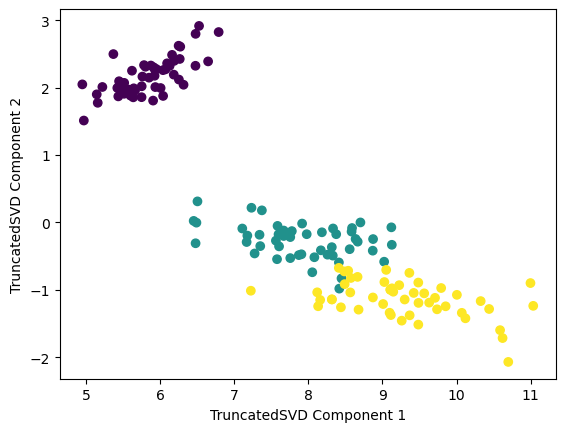

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

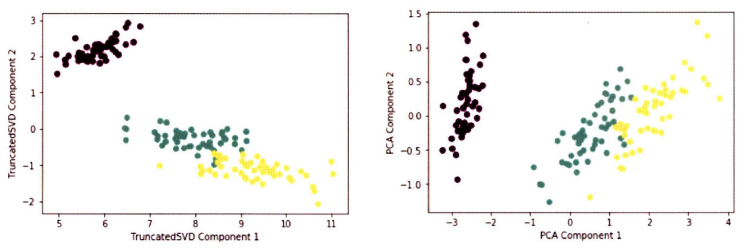
왼쪽의 그림이 TruncatedSVD로 변환된 붓꽃 데이터 세트이다. 오른쪽은 PCA로 변환된 붓꽃 데이터 세트이다. TruncatedSVD 변환 역시 PCA와 유사하게 변환 후 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

사이킷런의 TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬을 분해한다. 붓꽃 데이터를 스케일링으로 변환한 뒤 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있다.

Text(0.5, 1.0, 'PCA Transformed')

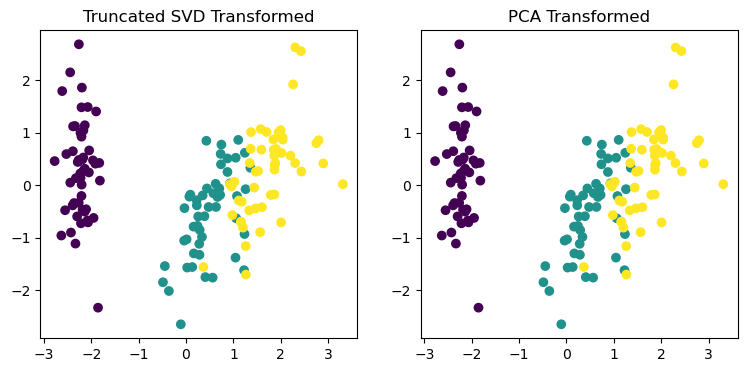

In [10]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2)=plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 비교해보면 거의 같음을 알 수 있다.

In [11]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3434148140507225e-15
-9.974659986866641e-18


모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능하다.

SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다. 또한 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘이다.

## **05. NMF(Non-Negative Matrix Factorization)**

### NMF 개요

NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.
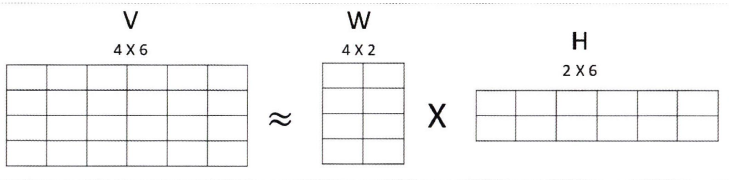
$4\times6$ 원본 행렬 V는 $4\times2$ 행렬 W와 $2\times6$ 행렬 H로 근사해 분해될 수 있다. 행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다. 이처럼 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해된다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬이다.

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있다. 사이킷런에서 NMF는 NMF 클래스를 이용해 지원된다. 붓꽃 데이터를 NMF를 이용해 2 개의 컴포넌트로 변환하고 이를 시각화해 보자.

Text(0, 0.5, 'NMF Component 2')

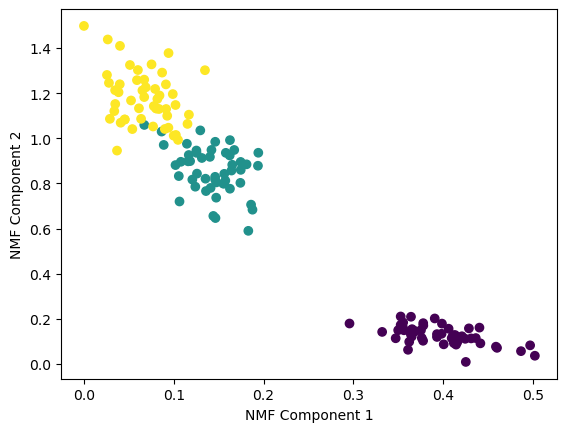

In [16]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2, max_iter=400)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 사용된다. 또한 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용된다. 사용자의 상품(예 : 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식이다(이를 잠재 요소(Latent Factoring) 기반의 추천 방식이라고 한다).

## 06. 정리

지금까지 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF에 대해 알아봤다. 많은 피처로 이루어진 데이터 세트를 PCA 같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있다. 무엇보다 차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있다. 이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등의 차원 축소 알고리즘이 활발하게 사용된다.

PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식이다. 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유 벡터(Eigenvector)를 생성하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식이다. LDA(Linear Discriminant Analysis)는 PCA와 매우 유사한 방식이며, PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소한다.

**SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법이다.** 특히 이러한 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용된다.